In [1]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/Users/Simon/GIT/GPlatesClassStruggle/')

from reconstruction_classes import *
from raster_reconstruction_classes import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

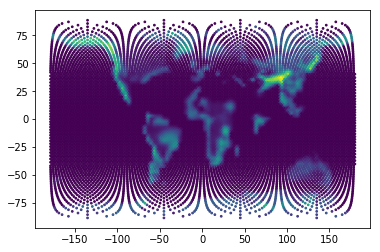

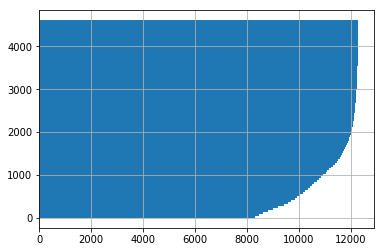

In [2]:
# Ypresian paleotopography from Lunt++ (2016)

# generate a raster class from the netcdf file
ptopo = GplatesRaster('../published/Lunt/orog_ypr.nc', z_field_name='oroguk')

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=32)

ptopo_ea = ptopo.sample_using_gmt(equal_area_points.longitude,equal_area_points.latitude)

plt.scatter(equal_area_points.longitude,equal_area_points.latitude,
            c=ptopo_ea,s=3)
plt.show()

# for hypsometric curve, only consider values above sea level
ind = np.bitwise_or(np.isnan(ptopo_ea),np.less_equal(ptopo_ea,0))

plt.hist(ptopo_ea,bins=100,cumulative=True,orientation='horizontal')
plt.grid()
plt.show()


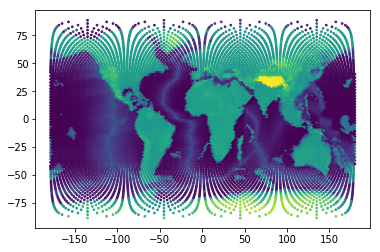

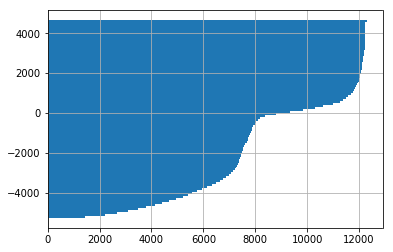

In [3]:
# Eocene(?) paleotopography from Herold++

ptopo = GplatesRaster('../published/Herold/topo01_proxy_0.5deg.nc')

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=32)

ptopo_ea = ptopo.sample_using_gmt(equal_area_points.longitude,equal_area_points.latitude)

plt.scatter(equal_area_points.longitude,equal_area_points.latitude,
            c=ptopo_ea,s=3)
plt.show()

# for hypsometric curve, only consider values above sea level
ind = np.bitwise_or(np.isnan(ptopo_ea),np.less_equal(ptopo_ea,0))

#plt.hist(ptopo_ea[~ind],bins=100,cumulative=True,orientation='horizontal')
#plt.show()

plt.hist(ptopo_ea,bins=100,cumulative=True,orientation='horizontal')
plt.grid()
plt.show()


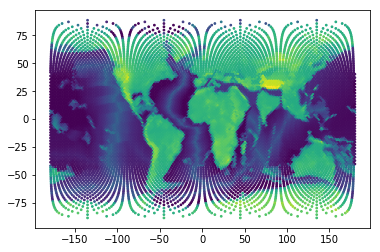

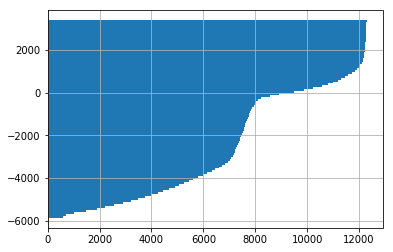

In [4]:
ptopo = GplatesRaster('../published/Baatsen/38Ma_Paleomag.nc', z_field_name='Z')

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=32)

ptopo_ea = ptopo.sample_using_gmt(equal_area_points.longitude,equal_area_points.latitude)

plt.scatter(equal_area_points.longitude,equal_area_points.latitude,
            c=ptopo_ea,s=3)
plt.show()

# for hypsometric curve, only consider values above sea level
ind = np.bitwise_or(np.isnan(ptopo_ea),np.less_equal(ptopo_ea,0))

#plt.hist(ptopo_ea[~ind],bins=100,cumulative=True,orientation='horizontal')
#plt.show()

plt.hist(ptopo_ea,bins=100,cumulative=True,orientation='horizontal')
plt.grid()
plt.show()

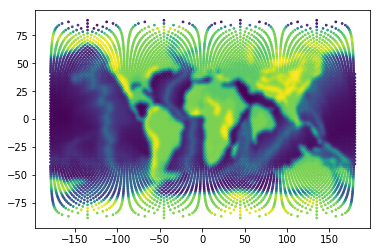

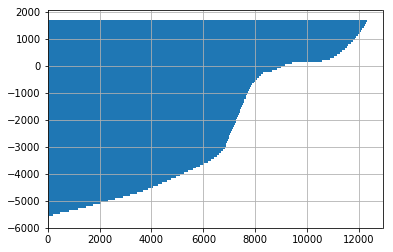

In [5]:
ptopo = GplatesRaster('../dev/paleotopo_grids_tests/paleotopobathy_buffer00d_filter1000.00km_0.50d_55.00Ma.nc')

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=32)

ptopo_ea = ptopo.sample_using_gmt(equal_area_points.longitude,equal_area_points.latitude)

plt.scatter(equal_area_points.longitude,equal_area_points.latitude,
            c=ptopo_ea,s=3)
plt.show()

# for hypsometric curve, only consider values above sea level
ind = np.bitwise_or(np.isnan(ptopo_ea),np.less_equal(ptopo_ea,0))

#plt.hist(ptopo_ea[~ind],bins=100,cumulative=True,orientation='horizontal')
#plt.show()

plt.hist(ptopo_ea,bins=100,cumulative=True,orientation='horizontal')
plt.grid()
plt.show()

# 
# 
# 
### Cells from here down use alternative spherical interpolation which give artefacts....

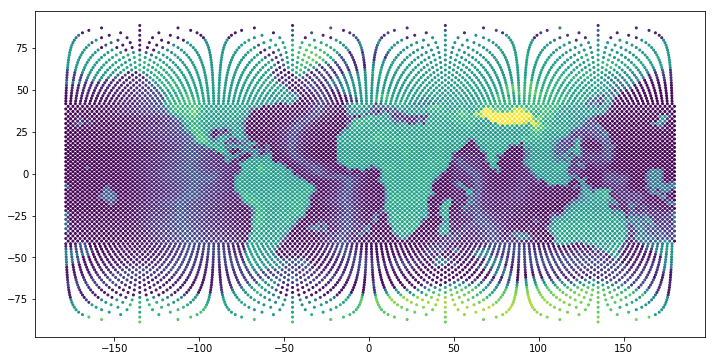

In [7]:
# generate a raster class from the netcdf file
ptopo = GplatesRaster('../published/Herold/topo01_2deg.nc')

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=32)


Xg, Yg = np.meshgrid(ptopo.gridX,ptopo.gridY)
d,l = pigsph.sampleOnSphere(Xg.flatten(),
                            Yg.flatten(), 
                            ptopo.gridZ.flatten(),
                            equal_area_points.longitude,
                            equal_area_points.latitude,
                            k=2)

#print d,l
# based on http://earthpy.org/interpolation_between_grids_with_ckdtree.html
# note also that where d is zero, we get a divide by zero error - hence, these 
# values are (currently) set to one 
#w = np.divide(1.,d**2, out=np.ones_like(d), where=d!=0)
w = np.divide(1.,d**2, out=np.ones_like(d), where=d!=0)
point_z = np.sum(w * ptopo.gridZ.flatten().ravel()[l],axis=1) / np.sum(w,axis=1)

plt.figure(figsize=(12,6))
plt.scatter(equal_area_points.longitude,equal_area_points.latitude,
            c=point_z,s=4)
#plt.imshow(ptopo.gridZ,origin='upper')
plt.show()



In [ ]:
import stripy as stripy

interpolator = stripy.sTriangulation(lons = np.radians(Xg.flatten()), 
                                     lats = np.radians(Yg.flatten()))#,refinement_levels=1)

dat,err = interpolator.interpolate(np.radians(equal_area_points.longitude),
                                   np.radians(equal_area_points.latitude), 
                                   ptopo.gridZ.flatten(),
                                   order=1)

plt.figure(figsize=(16,8))
plt.scatter(equal_area_points.longitude,equal_area_points.latitude,
            c=dat,s=4)
#plt.scatter(Xg.flatten(),Yg.flatten(),
#            c=ptopo.gridZ.flatten(),s=5)
plt.show()


In [41]:
import litho1pt0

print litho1pt0._mesh_coords.T[2]
print litho1pt0._mesh_coords.T[1]
print litho1pt0._mesh_coords.T[0]

print Xg.flatten()


[   0.      72.       0.    ..., -143.032 -144.    -144.968]
[ 90.      26.7193  26.7193 ..., -52.4628 -53.4907 -52.4628]
[ 90.      26.5651  26.5651 ..., -52.2767 -53.3065 -52.2767]
[   0.      3.75    7.5  ...,  348.75  352.5   356.25]
